In [1]:
%%capture
%matplotlib inline
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from urbansim.utils import misc

from ipywidgets import interact
from ipywidgets import FloatSlider

import orca

from lcog import datasources
from lcog import variables
from lcog import models

def skim_access_plot(attrib, skim_col, minutes):
    
    ## The compute_range function in urbansim can be used for skim-based aggregations
    result = misc.compute_range(travel_data, zone_geoms[attrib], skim_col, minutes)
    zone_geoms['result'] = result
    zone_geoms.result = zone_geoms.result.fillna(0)
    
    f = plt.figure(figsize=(10, 8))
    ax = f.gca()
    ax.set_title('%s within %s %s' % (attrib, minutes, skim_col))
    kw = dict(column='result', k=6, cmap='YlGn', alpha=1, legend=True, edgecolor='gray', linewidth=0.3)
    zone_geoms.plot(scheme='Quantiles', ax=ax, **kw)
    ax.set_axis_off()

Calculating sum_residential_units of buildings for zones
Disaggregating zone_id to buildings from parcels
Calculating number of households for zones
Disaggregating zone_id to households from parcels
Calculating number of jobs for zones
Disaggregating zone_id to jobs from parcels
Calculating sum_job_spaces of buildings for zones
Calculating sum_residential_units of buildings for parcels
Calculating sum_non_residential_sqft of buildings for parcels
Calculating mean_persons of households for zones
Calculating median_persons of households for zones
Calculating std_persons of households for zones
Calculating sum_persons of households for zones
Calculating mean_income of households for zones
Calculating median_income of households for zones
Calculating std_income of households for zones
Calculating mean_race_of_head of households for zones
Calculating median_race_of_head of households for zones
Calculating std_race_of_head of households for zones
Calculating mean_age_of_head of households fo

/home/janowicz/clients/lcog/lcog/lcog/variables.py:185: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  buildings.repm_id[buildings.building_type_id.isin(retail_btypes)] = 'retail'
/home/janowicz/clients/lcog/lcog/lcog/variables.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  buildings.repm_id[buildings.building_type_id.isin(industrial_btypes)] = 'industrial'
/home/janowicz/clients/lcog/lcog/lcog/variables.py:192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  buildings.repm_id[buil

Calculating proportion repm_id res_sf_detached for zones
Calculating proportion repm_id duplex_townhome for zones
Calculating proportion repm_id multifamily for zones
Calculating proportion repm_id retail for zones
Calculating proportion repm_id industrial for zones
Calculating proportion repm_id office for zones
Calculating proportion repm_id educational for zones
Calculating ratio of jobs to households for zones
Calculating ratio of workers to persons for zones
Calculating ratio of households to residential_units for zones
Calculating density of households for zones
Calculating density of jobs for zones
Calculating density of buildings for zones


/home/janowicz/anaconda2/envs/template/lib/python3.6/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


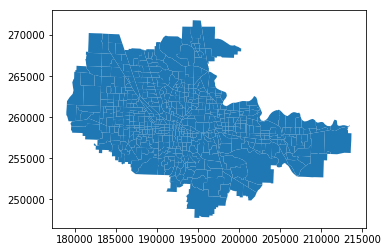

In [2]:
zone_geoms = gpd.read_file('data/zones/zones.geojson').set_index('zone_id')

travel_data = orca.get_table('travel_data').local
zone_attribs = orca.get_table('zones').to_frame()

for col in zone_attribs.columns:
    zone_geoms[col] = zone_attribs[col]

zone_geoms.plot()

In [3]:
travel_data.head()

,,am_peak_travel_time,md_offpeak_travel_time
from_zone_id,to_zone_id,,
25,25,1.480275,1.480275
26,25,4.786977,4.785728
27,25,7.182497,7.186829
28,25,12.340582,12.332867
29,25,11.139704,11.120481


In [4]:
interact(skim_access_plot, attrib=zone_attribs.columns, skim_col=travel_data.columns, minutes=FloatSlider(min=1, max=35, step=1, continuous_update=False))

interactive(children=(Dropdown(description='attrib', options=('sum_residential_units_1110', 'sum_residential_u…

<function __main__.skim_access_plot(attrib, skim_col, minutes)>